IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *

LOADING THE DATA

In [2]:
df=pd.read_csv("Sales.csv")

In [3]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [4]:
df.tail()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.00075
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.00000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.00000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.00000
3113,GIONEE,F9,Blue,3 GB,32 GB,Yes,4.2,7900,7900,GIONEE F9,0,0.00000


In [5]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [7]:
print(df.dtypes)

Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
dtype: object


DATA CLEANING

In [8]:
print(df.isnull().sum())

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


In [9]:

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  


In [10]:
df=df.dropna(subset=['Memory','Storage'])

In [11]:
print(df.isnull().sum())

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


In [12]:
df.drop_duplicates()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.000000,2199,2199,GIONEE L800,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,512 MB,4 GB,Yes,4.000000,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.200000,2299,2299,SAMSUNG Metro 313,0,0.000000
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.400000,16999,19999,POCO M4 Pro 5G,3000,15.000750
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,4.243098,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [13]:
len(df)

3032

EXPLORATORY DATA ANALYSIS

In [14]:
top_five=df.sort_values(by='Original Price',ascending=True)
top_five.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
1501,Nokia,105,Black,4 MB,4 MB,Yes,4.3,1000,1000,Nokia 105,0,0.0
2054,Nokia,Ta -1010/105,Black,4 MB,4 MB,Yes,4.2,1000,1000,Nokia Ta -1010/105,0,0.0
978,GIONEE,L700,Black,8 MB,16 MB,Yes,3.9,1099,1099,GIONEE L700,0,0.0
485,Nokia,TA-1174 / TA-1299,Black,4 MB,4 MB,Yes,4.2,1149,1149,Nokia TA-1174 / TA-1299,0,0.0
1264,Nokia,TA-1010/105,Black,4 MB,4 MB,Yes,4.2,1332,1332,Nokia TA-1010/105,0,0.0


In [15]:
top_five=df.sort_values(by='Selling Price',ascending=True)
top_five.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
1501,Nokia,105,Black,4 MB,4 MB,Yes,4.3,1000,1000,Nokia 105,0,0.000000
2054,Nokia,Ta -1010/105,Black,4 MB,4 MB,Yes,4.2,1000,1000,Nokia Ta -1010/105,0,0.000000
2487,GIONEE,S96,Black,8 MB,16 MB,Yes,3.7,1099,1999,GIONEE S96,900,45.022511
978,GIONEE,L700,Black,8 MB,16 MB,Yes,3.9,1099,1099,GIONEE L700,0,0.000000
485,Nokia,TA-1174 / TA-1299,Black,4 MB,4 MB,Yes,4.2,1149,1149,Nokia TA-1174 / TA-1299,0,0.000000


In [16]:
least_five=df.sort_values(by='Original Price',ascending=False)
least_five.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
3099,SAMSUNG,Galaxy Fold 2,Mystic Bronze,12 GB,256 GB,Yes,3.000000,149999,189999,SAMSUNG Galaxy Fold 2,40000,21.052742
1595,SAMSUNG,Galaxy Fold 2,Mystic Black,12 GB,256 GB,Yes,3.000000,149999,189999,SAMSUNG Galaxy Fold 2,40000,21.052742
1650,SAMSUNG,Galaxy Z Fold3 5G,Phantom Black,12 GB,512 GB,Yes,4.400000,157999,179999,SAMSUNG Galaxy Z Fold3 5G,22000,12.222290
1626,SAMSUNG,Galaxy Z Fold3 5G,Phantom Black,12 GB,512 GB,Yes,4.400000,157999,179999,SAMSUNG Galaxy Z Fold3 5G,22000,12.222290
2032,Apple,iPhone 13 Pro Max,Graphite,6 GB,1 TB,Yes,4.243098,179900,179900,Apple iPhone 13 Pro Max,0,0.000000


In [17]:
least_five=df.sort_values(by='Selling Price',ascending=False)
least_five.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
2032,Apple,iPhone 13 Pro Max,Graphite,6 GB,1 TB,Yes,4.243098,179900,179900,Apple iPhone 13 Pro Max,0,0.0
831,Apple,iPhone 13 Pro Max,Gold,4GB,1 TB,Yes,4.700000,179900,179900,Apple iPhone 13 Pro Max,0,0.0
799,Apple,iPhone 13 Pro Max,Sierra Blue,4GB,1 TB,Yes,4.700000,179900,179900,Apple iPhone 13 Pro Max,0,0.0
903,Apple,iPhone 13 Pro Max,Silver,4GB,1 TB,Yes,4.700000,179900,179900,Apple iPhone 13 Pro Max,0,0.0
1285,Apple,iPhone 13 Pro Max,Silver,6 GB,1 TB,Yes,4.243098,179900,179900,Apple iPhone 13 Pro Max,0,0.0


DATA VISUALIZATION

AVERAGE PRICES OF BRANDS

In [18]:
avg_price_df=df.groupby('Brands')['Selling Price'].mean()

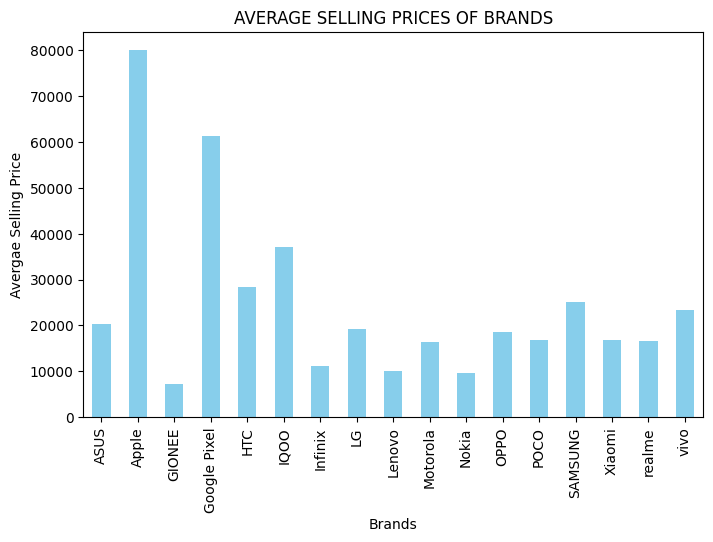

In [19]:
avg_price_df.plot(kind='bar',figsize=(8,5),color='skyblue')
plt.xlabel('Brands')
plt.ylabel('Avergae Selling Price')
plt.title("AVERAGE SELLING PRICES OF BRANDS")
plt.show()

AVERAGE RATING OF BRANDS

In [20]:
avg_rating_df=df.groupby('Brands')['Rating'].mean()

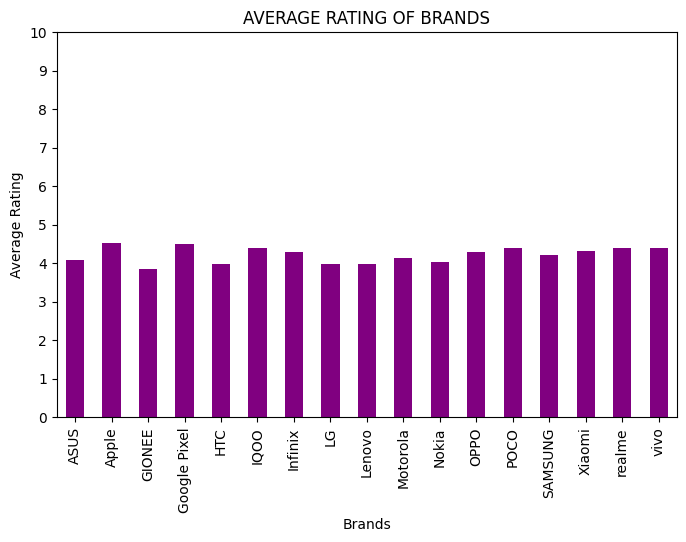

In [21]:
avg_rating_df.plot(kind='bar',figsize=(8,5),color='purple')
plt.xlabel("Brands")
plt.ylabel("Average Rating")
y_axis=[0,1,2,3,4,5,6,7,8,9,10]
plt.yticks(y_axis)
plt.title("AVERAGE RATING OF BRANDS")
plt.show()

SELLING PRICE VS ORIGINAL PRICE

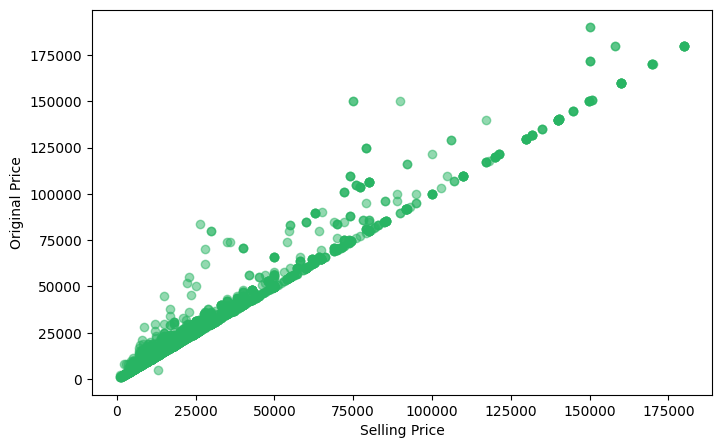

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df['Selling Price'],df['Original Price'],color='#28B463',alpha=0.5)
plt.xlabel("Selling Price")
plt.ylabel("Original Price")
plt.show()

BRAND DISTRIBUTION

In [23]:
brand_distribution=df['Brands'].value_counts()
brand_distribution

Brands
SAMSUNG         696
Apple           369
realme          294
OPPO            260
Nokia           209
Xiaomi          197
Infinix         151
GIONEE          129
vivo            121
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

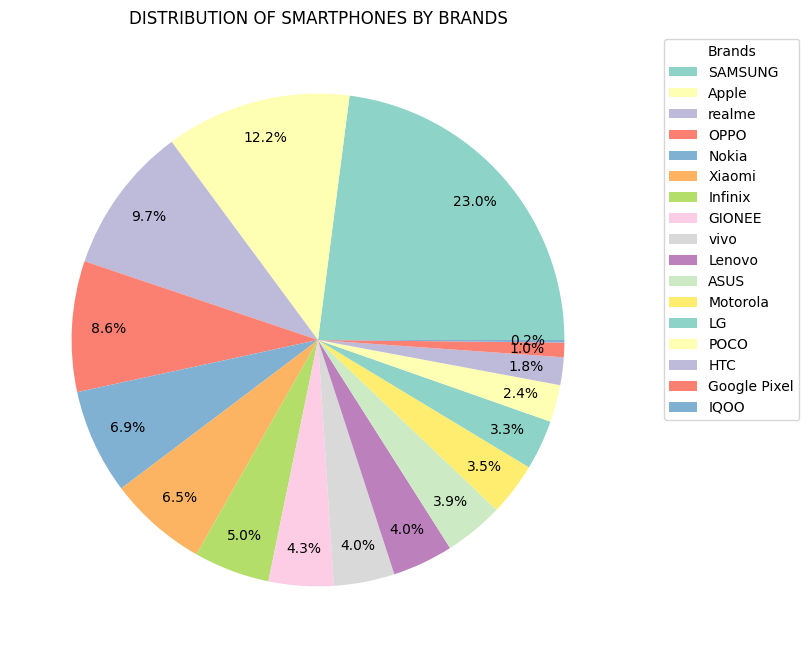

In [24]:
plt.figure(figsize=(15,8))
plt.pie(brand_distribution,autopct='%1.1f%%',labeldistance=1.2,pctdistance=0.85, colors=sns.color_palette('Set3', len(brand_distribution)))
plt.title("DISTRIBUTION OF SMARTPHONES BY BRANDS")
plt.legend(brand_distribution.index,title="Brands",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


In [25]:
df['Discount Price']=df['Original Price']-df['Discount']
discount_df=df.groupby('Brands')[['Discount Price','Original Price']].mean()
discount_df=discount_df.reset_index()
discount_df

,Brands,Discount Price,Original Price
0,ASUS,20326.915254,21585.389831
1,Apple,80001.661247,83076.487805
2,GIONEE,7135.093023,7818.612403
3,Google Pixel,61391.862069,62012.206897
4,HTC,28314.381818,28314.381818
5,IQOO,37190.000000,40990.000000
6,Infinix,11092.178808,12018.086093
7,LG,19323.181818,22367.777778
8,Lenovo,10083.842975,10350.512397
9,Motorola,16357.466667,20681.361905


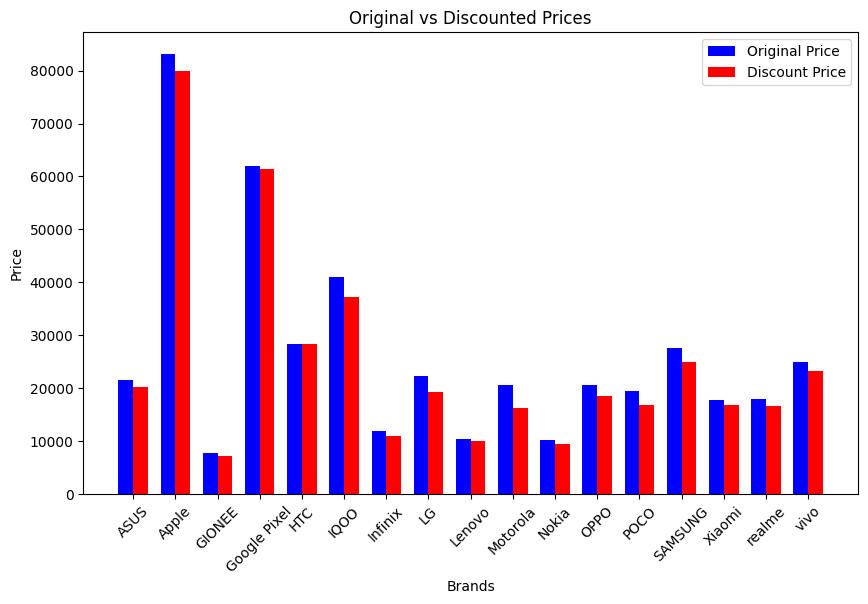

In [26]:
fig,ax=plt.subplots(figsize=(10,6))
bar_width=0.35
index=range(len(discount_df))
ax.bar(index,discount_df['Original Price'],bar_width,label='Original Price',color='blue')
ax.bar([i+bar_width for i in index],discount_df['Discount Price'],bar_width,label='Discount Price',color='red')
plt.xlabel("Brands")
plt.ylabel("Price")
plt.title('Original vs Discounted Prices')
plt.xticks([i + bar_width / 2 for i in index])  
ax.set_xticklabels(discount_df['Brands'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

CORRELATION BETWEEN FEATURES

In [27]:
df['Memory']=df['Memory'].str.replace(r'\D','',regex=True).astype(int)

In [28]:
df['Storage']=df['Storage'].str.replace(r'\D','',regex=True).astype(int)

In [29]:
df.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Discount Price
0,SAMSUNG,GALAXY M31S,Mirage Black,8,128,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,19330
1,Nokia,3.2,Steel,2,16,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,10199
3,Infinix,Note 5,Ice Blue,4,64,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,12999
4,Apple,iPhone 11,Black,4,64,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,49900
5,GIONEE,L800,Black,8,16,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,2199


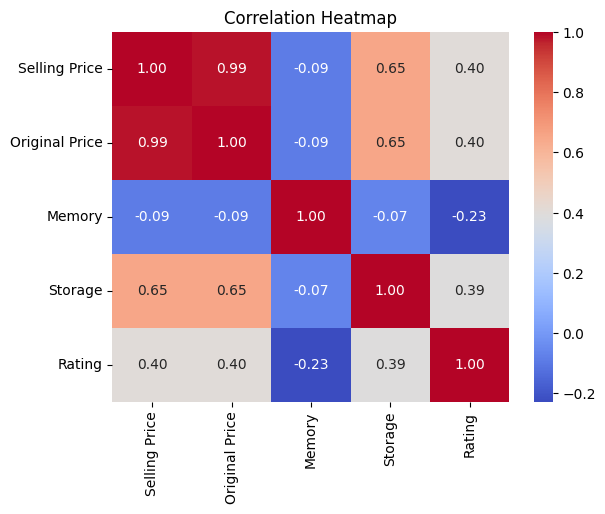

In [30]:
corr_matrix=df[['Selling Price', 'Original Price', 'Memory', 'Storage', 'Rating']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
            

DISCOUNT IMPACT ON RATING

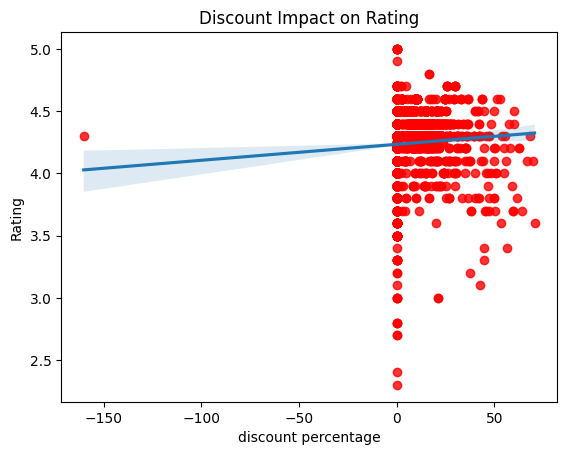

In [31]:
sns.regplot(x='discount percentage', y='Rating', data=df, scatter_kws={'color': 'red'})
plt.title('Discount Impact on Rating')
plt.show()


FEATURE RELATIONSHIPS BY BRANDS

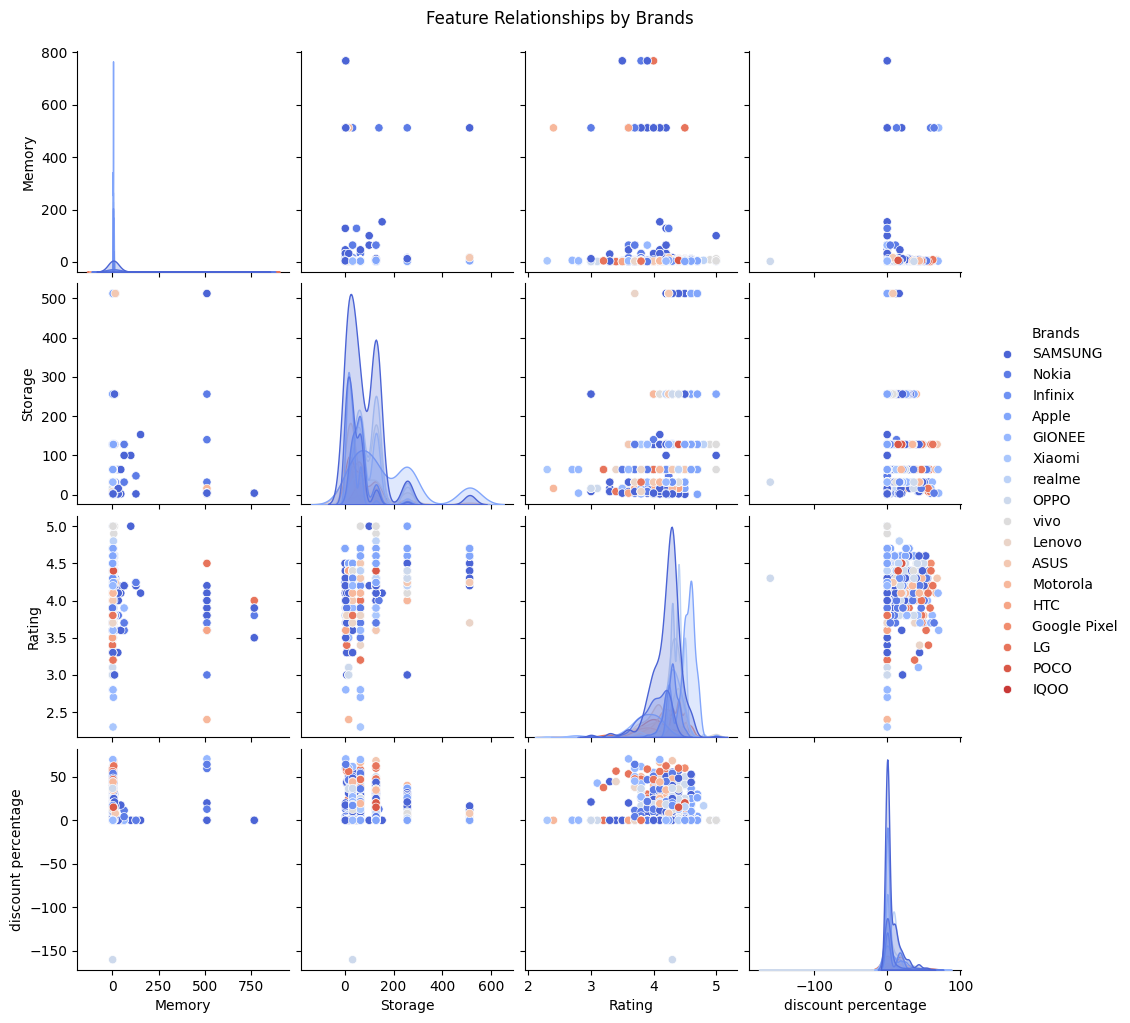

In [32]:
sns.pairplot(df,vars=['Memory','Storage','Rating','discount percentage'],hue='Brands',palette='coolwarm')
plt.suptitle("Feature Relationships by Brands",y=1.02)
plt.show()


PRICE DISTRIBUTION ACROSS TOP BRANDS

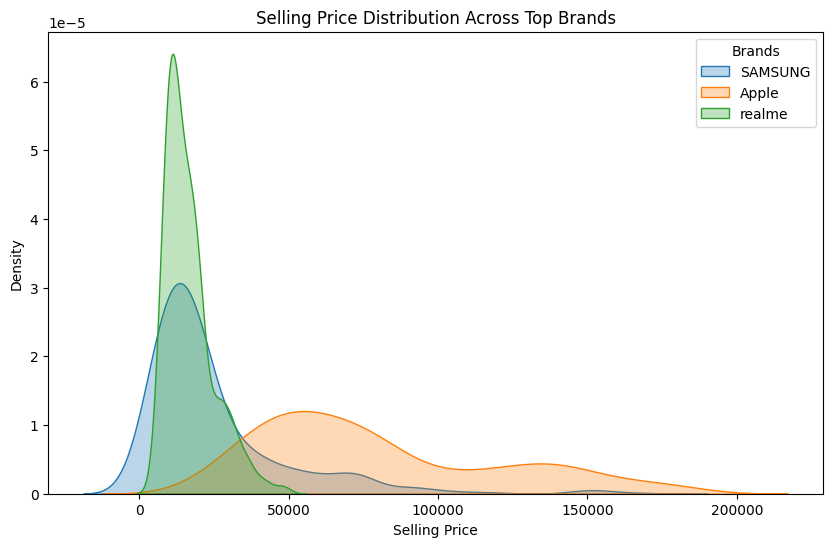

In [33]:
plt.figure(figsize=(10, 6))
top_brands = df['Brands'].value_counts().head(3).index
for brand in top_brands:
    sns.kdeplot(df[df['Brands'] == brand]['Selling Price'], label=brand, fill=True, alpha=0.3)

plt.title('Selling Price Distribution Across Top Brands')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.legend(title='Brands')
plt.show()


MACHINE LEARNING PART

PREDICTING THE PRICE BASED ON SOME FEATURES

In [34]:
new_df=df.copy()
new_df.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Discount Price
0,SAMSUNG,GALAXY M31S,Mirage Black,8,128,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,19330
1,Nokia,3.2,Steel,2,16,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,10199
3,Infinix,Note 5,Ice Blue,4,64,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,12999
4,Apple,iPhone 11,Black,4,64,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,49900
5,GIONEE,L800,Black,8,16,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,2199


In [35]:
new_df['Brands']=pd.factorize(new_df['Brands'])[0]
new_df.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Discount Price
0,0,GALAXY M31S,Mirage Black,8,128,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,19330
1,1,3.2,Steel,2,16,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,10199
3,2,Note 5,Ice Blue,4,64,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,12999
4,3,iPhone 11,Black,4,64,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,49900
5,4,L800,Black,8,16,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,2199


In [36]:
x=new_df[['Brands','Memory','Storage','Rating']]
y=new_df['Selling Price']

In [37]:
print(new_df.dtypes)

Brands                   int64
Models                  object
Colors                  object
Memory                   int64
Storage                  int64
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
Discount Price           int64
dtype: object


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mse

np.float64(624492867.9587187)

CLASSIFYING THE SMARTPHONES INTO HIGH-LOW RATED GROUPS

In [41]:
max(df['Rating'])

5.0

In [42]:
threshold=3.5
new_df['Rating Category']=new_df['Rating'].apply(lambda x:1 if(x>=threshold) else 0)

In [43]:
new_df.head(5)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Discount Price,Rating Category
0,0,GALAXY M31S,Mirage Black,8,128,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,19330,1
1,1,3.2,Steel,2,16,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,10199,1
3,2,Note 5,Ice Blue,4,64,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,12999,1
4,3,iPhone 11,Black,4,64,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,49900,1
5,4,L800,Black,8,16,Yes,4.0,2199,2199,GIONEE L800,0,0.000000,2199,1


In [44]:
new_df.dtypes

Brands                   int64
Models                  object
Colors                  object
Memory                   int64
Storage                  int64
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
Discount Price           int64
Rating Category          int64
dtype: object

In [45]:
x=new_df[['Memory','Storage','Selling Price','Discount']]
y=new_df['Rating Category']
x,y

(      Memory  Storage  Selling Price  Discount
 0          8      128          19330      1669
 1          2       16          10199         0
 3          4       64          12999         0
 4          4       64          49900         0
 5          8       16           2199         0
 ...      ...      ...            ...       ...
 3108       4        2           2299         0
 3109       6      128          16999      3000
 3111       2      128          44900         0
 3112       6      128         119900         0
 3113       3       32           7900         0
 
 [3032 rows x 4 columns],
 0       1
 1       1
 3       1
 4       1
 5       1
        ..
 3108    1
 3109    1
 3111    1
 3112    1
 3113    1
 Name: Rating Category, Length: 3032, dtype: int64)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
classifier=RandomForestClassifier(random_state=42)

In [48]:
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = classifier.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.9901153212520593
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00       604

    accuracy                           0.99       607
   macro avg       0.50      0.50      0.50       607
weighted avg       0.99      0.99      0.99       607



In [50]:
for pred,true in zip(y_pred,y_test):
    print(f"Predicted: {pred}, Actual: {true}")

Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Ac

FEATURE IMPORTANCE

Text(0, 0.5, 'Features')

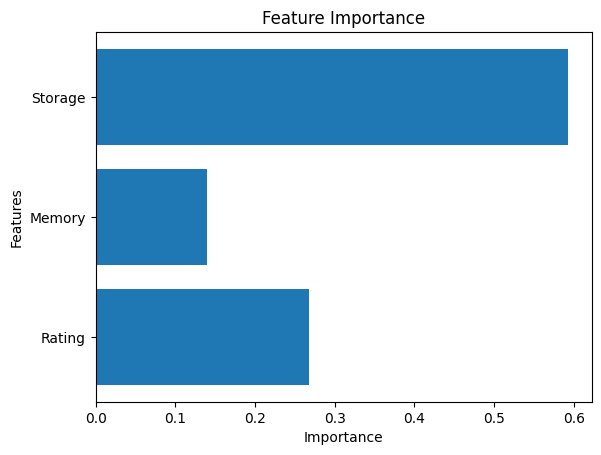

In [51]:
x=new_df[['Rating','Memory','Storage']]
y=new_df['Selling Price']

model=RandomForestRegressor(n_estimators=100)
model.fit(x,y)
importance=model.feature_importances_
features=x.columns
plt.barh(features,importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

CUSTOMER REVIEW - SENTIMENTAL ANALYSIS

In [60]:
url1='https://www.amazon.in/Samsung-Awesome-Iceblue-Storage-Nightography/product-reviews/B0CWPDYS2C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [55]:
8870191305

8870191305